In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier



In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,55,High,High,Yes,Low,Overweight,High
1,43,Normal,Normal,No,Moderate,Normal,Low
2,60,High,High,Yes,Low,Obese,High
3,35,Normal,Low,No,High,Normal,Low
4,50,High,High,No,Low,Overweight,Medium


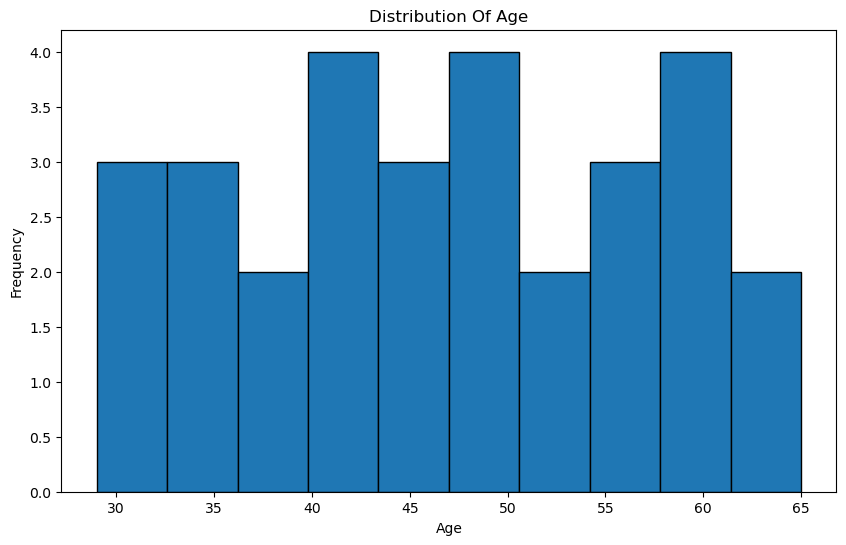

In [3]:
# 1
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins = 10, edgecolor = 'black' )
plt.title('Distribution Of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

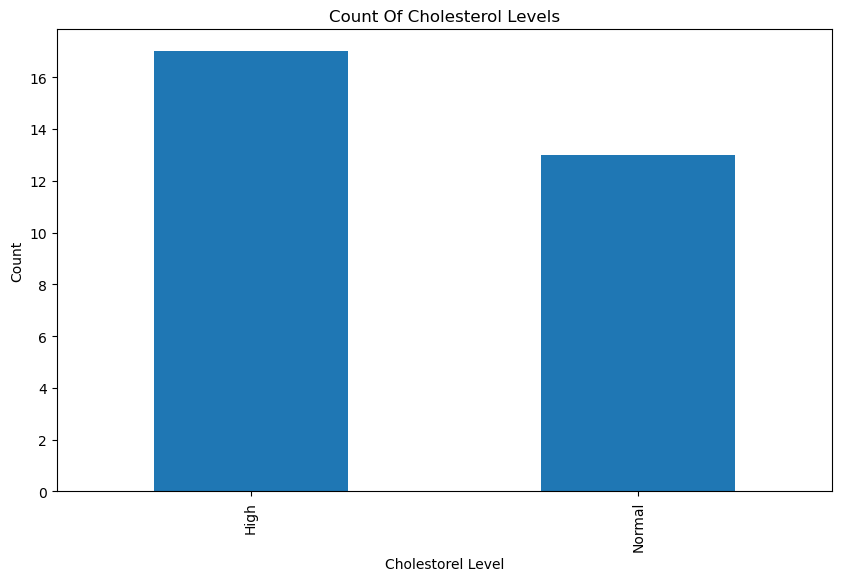

In [4]:
# 2
plt.figure(figsize=(10,6))
df['Cholesterol Level'].value_counts().plot(kind='bar')
plt.title('Count Of Cholesterol Levels')
plt.xlabel('Cholestorel Level')
plt.ylabel('Count')
plt.show()

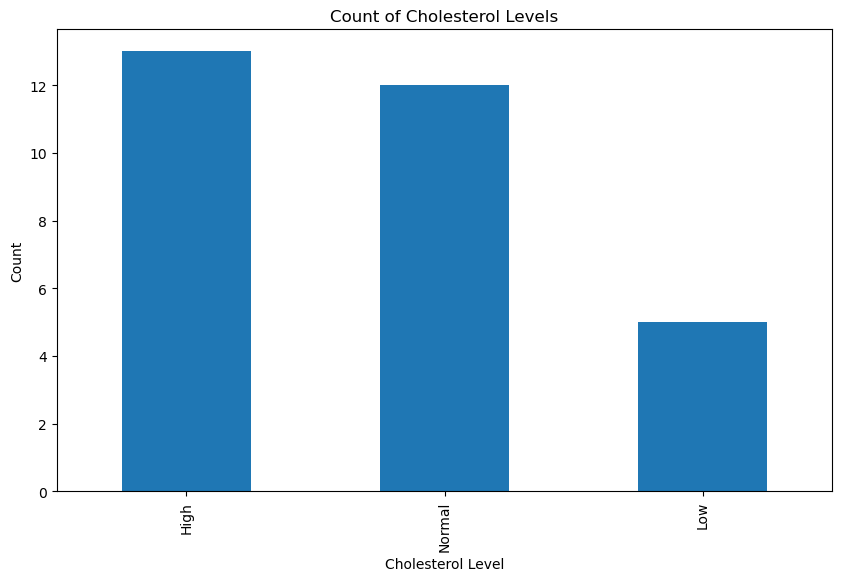

In [5]:
# 3
plt.figure(figsize=(10,6))
df['Blood Pressure'].value_counts().plot(kind='bar')
plt.title('Count of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.show()

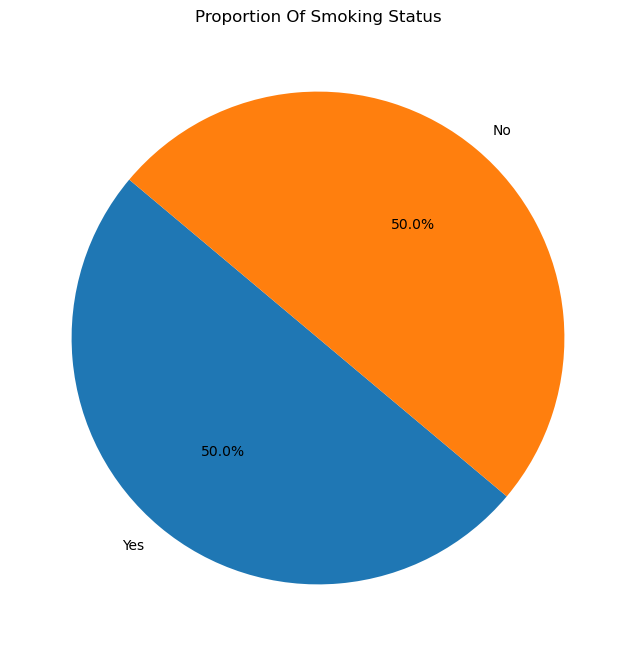

In [6]:
# 4
plt.figure(figsize=(8,8))
df['Smoking'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', startangle = 140)
plt.title('Proportion Of Smoking Status')
plt.ylabel('')
plt.show()

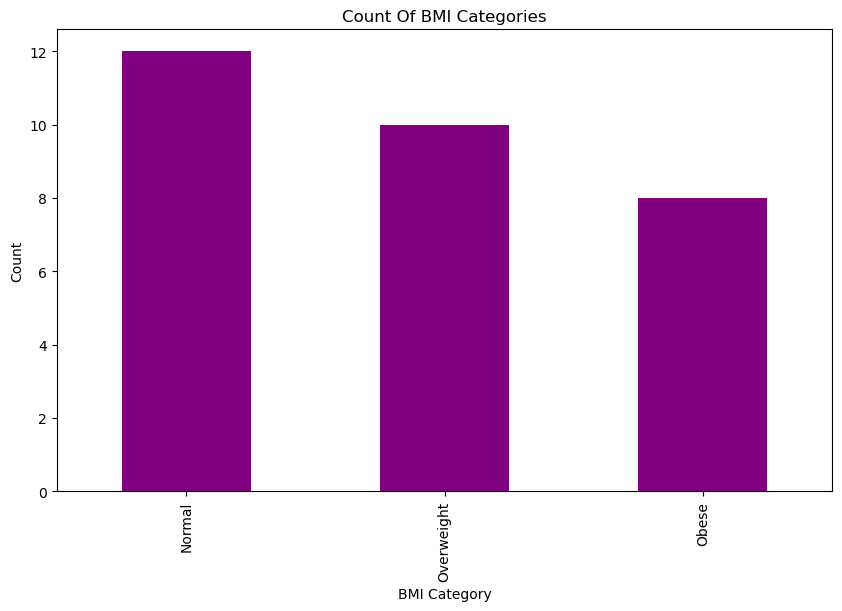

In [7]:
# 5
plt.figure(figsize=(10,6))
df['BMI'].value_counts().plot(kind='bar', color = 'purple')
plt.title('Count Of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

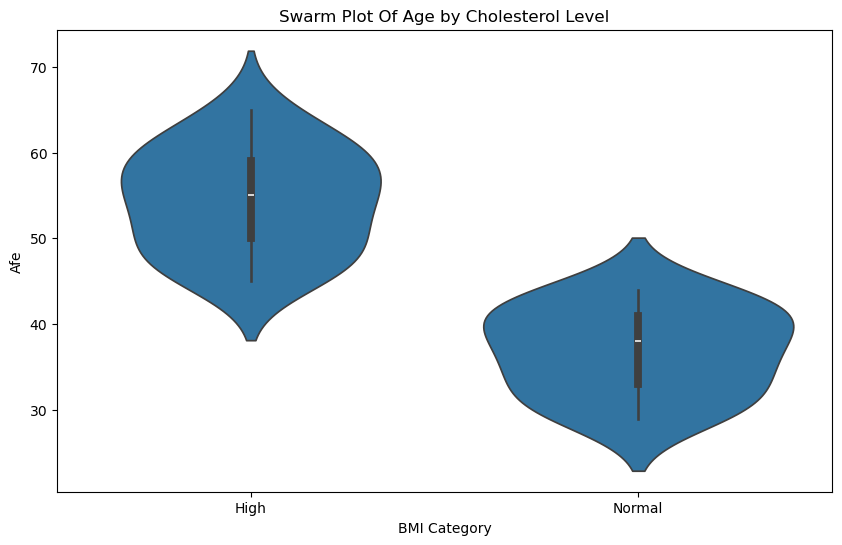

In [8]:
# 6
plt.figure(figsize=(10,6))
sns.violinplot(data = df, x = 'Cholesterol Level', y = 'Age')
plt.title('Swarm Plot Of Age by Cholesterol Level')
plt.xlabel('BMI Category')
plt.ylabel('Afe')
plt.show()

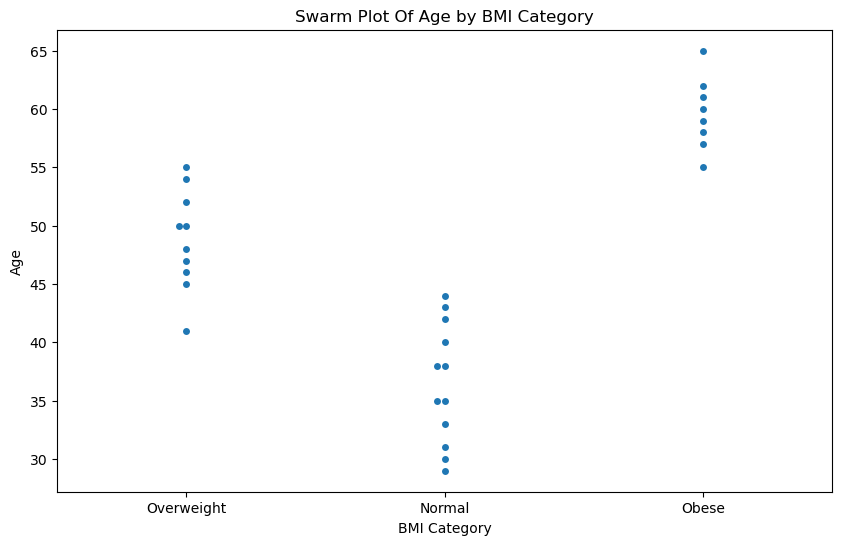

In [9]:
#7
plt.figure(figsize=(10,6))
sns.swarmplot(data = df, x = 'BMI', y = 'Age')
plt.title('Swarm Plot Of Age by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Age')
plt.show()

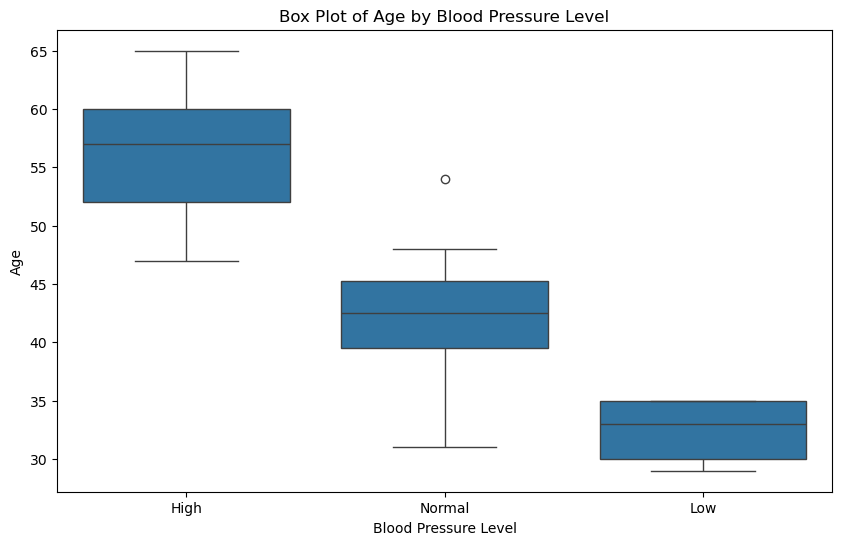

In [10]:
# 8
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x = 'Blood Pressure', y = 'Age')
plt.title('Box Plot of Age by Blood Pressure Level')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Age')
plt.show()

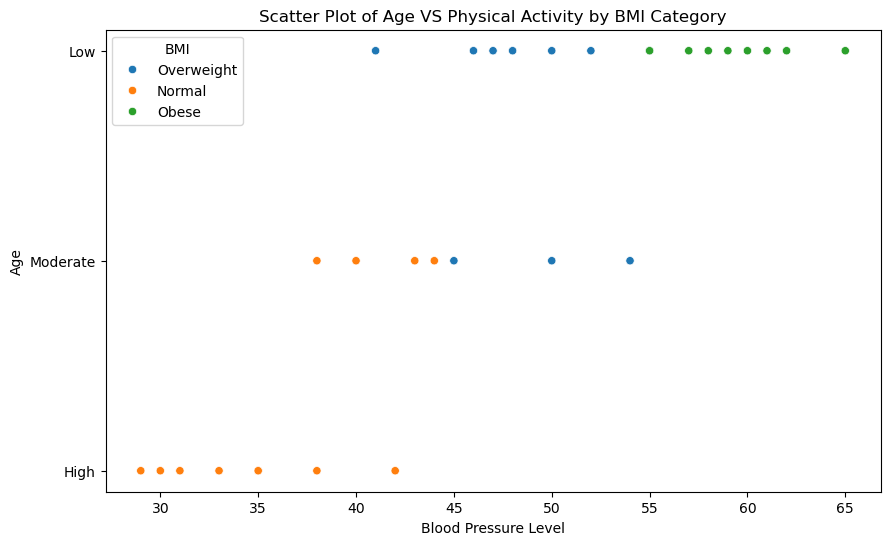

In [11]:
# 9
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x = 'Age', y = 'Physical Activity', hue = 'BMI')
plt.title('Scatter Plot of Age VS Physical Activity by BMI Category')
plt.xlabel('Blood Pressure Level')
plt.ylabel('Age')
plt.show()

In [12]:
# Membuat fungsi untuk mengkategorikan usia
def categorize_age(age):
    if age < 35:
        return 'Young'
    elif age < 55:
        return 'Middle-aged'
    else:
        return 'Senior'

In [13]:
df['Age'] = df['Age'].apply(categorize_age)

In [14]:
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,Senior,High,High,Yes,Low,Overweight,High
1,Middle-aged,Normal,Normal,No,Moderate,Normal,Low
2,Senior,High,High,Yes,Low,Obese,High
3,Middle-aged,Normal,Low,No,High,Normal,Low
4,Middle-aged,High,High,No,Low,Overweight,Medium


In [15]:
# Encode semua variabel kategori
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [16]:
# mempersiapkan data
df.head()

,Age,Cholesterol Level,Blood Pressure,Smoking,Physical Activity,BMI,Heart Disease Risk
0,1,0,0,1,1,2,0
1,0,1,2,0,2,0,1
2,1,0,0,1,1,1,0
3,0,1,1,0,0,0,1
4,0,0,0,0,1,2,2


In [17]:
X = df.drop('Heart Disease Risk', axis = 1)
y = df['Heart Disease Risk']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [19]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
y_pred = model.predict(X_test)

In [21]:
new_data = pd.DataFrame({
    'Age' : [label_encoders['Age'].transform(['Middle-aged'])[0]],
    'Cholesterol Level': [label_encoders['Cholesterol Level'].transform(['High'])[0]],
    'Blood Pressure' : [label_encoders['Blood Pressure'].transform(['High'])[0]],
    'Smoking' : [label_encoders['Smoking'].transform(['Yes'])[0]],
    'Physical Activity' : [label_encoders['Physical Activity'].transform(['Low'])[0]],
    'BMI' : [label_encoders['BMI'].transform(['Overweight'])[0]]
})

In [22]:
new_prediction = model.predict(new_data)

In [23]:
new_prediction_decoded = label_encoders['Heart Disease Risk'].inverse_transform(new_prediction)

In [24]:
new_prediction_decoded

array(['High'], dtype=object)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)

In [26]:
accuracy, conf_matrix

(1.0,
 array([[3, 0, 0],
        [0, 5, 0],
        [0, 0, 1]], dtype=int64))

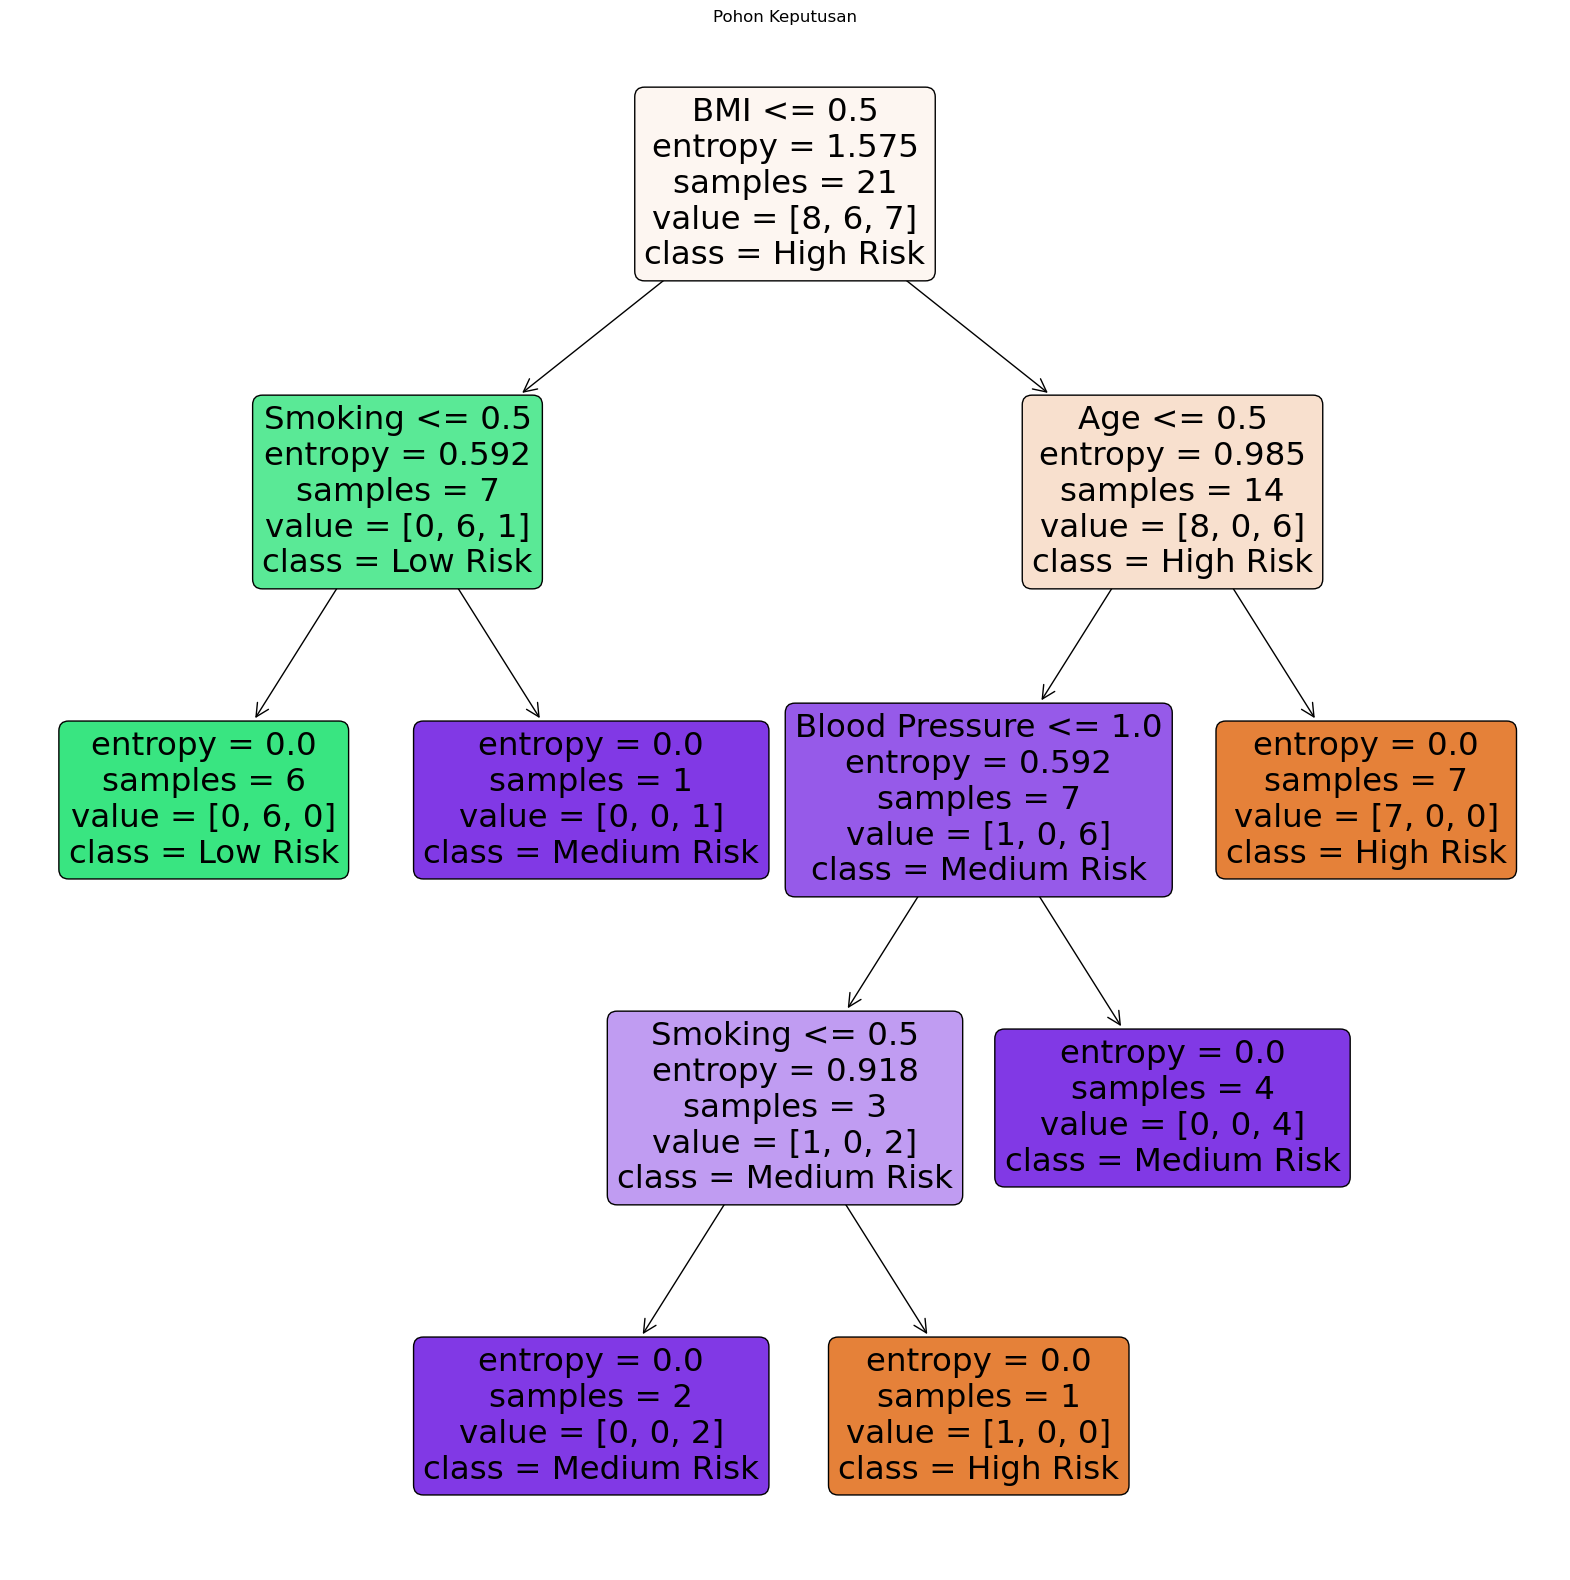

In [27]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(model, feature_names = ['Age','Cholesterol Level', 'Blood Pressure', 'Smoking', 'Physucak Activity', 'BMI'], class_names= ['High Risk', 'Low Risk', 'Medium Risk'], filled = True, rounded = True)

plt.title('Pohon Keputusan')
plt.show()

In [28]:
import pickle
filename = 'c45_pinjam_mode.pkl'
pickle.dump(new_prediction_decoded, open(filename, 'wb'))